## Exploring CNN By keras
-------------------------------------------------------------------------------------------------------------------------------
This notebook presents my exploration of Convolutional Nueral Networks by using keras. I tried different combination of hyperparameters and techniques for better results, until now I achieved 99.31%  test accuract in it. I tried to create this notebook which gives you a complete walkthrough of CNN and how to implement it in Keras. 

For that here I am gonna use the standard MNIST dataset. So let me first give you a brief about this dataset and then we will begin our journey of CNN.

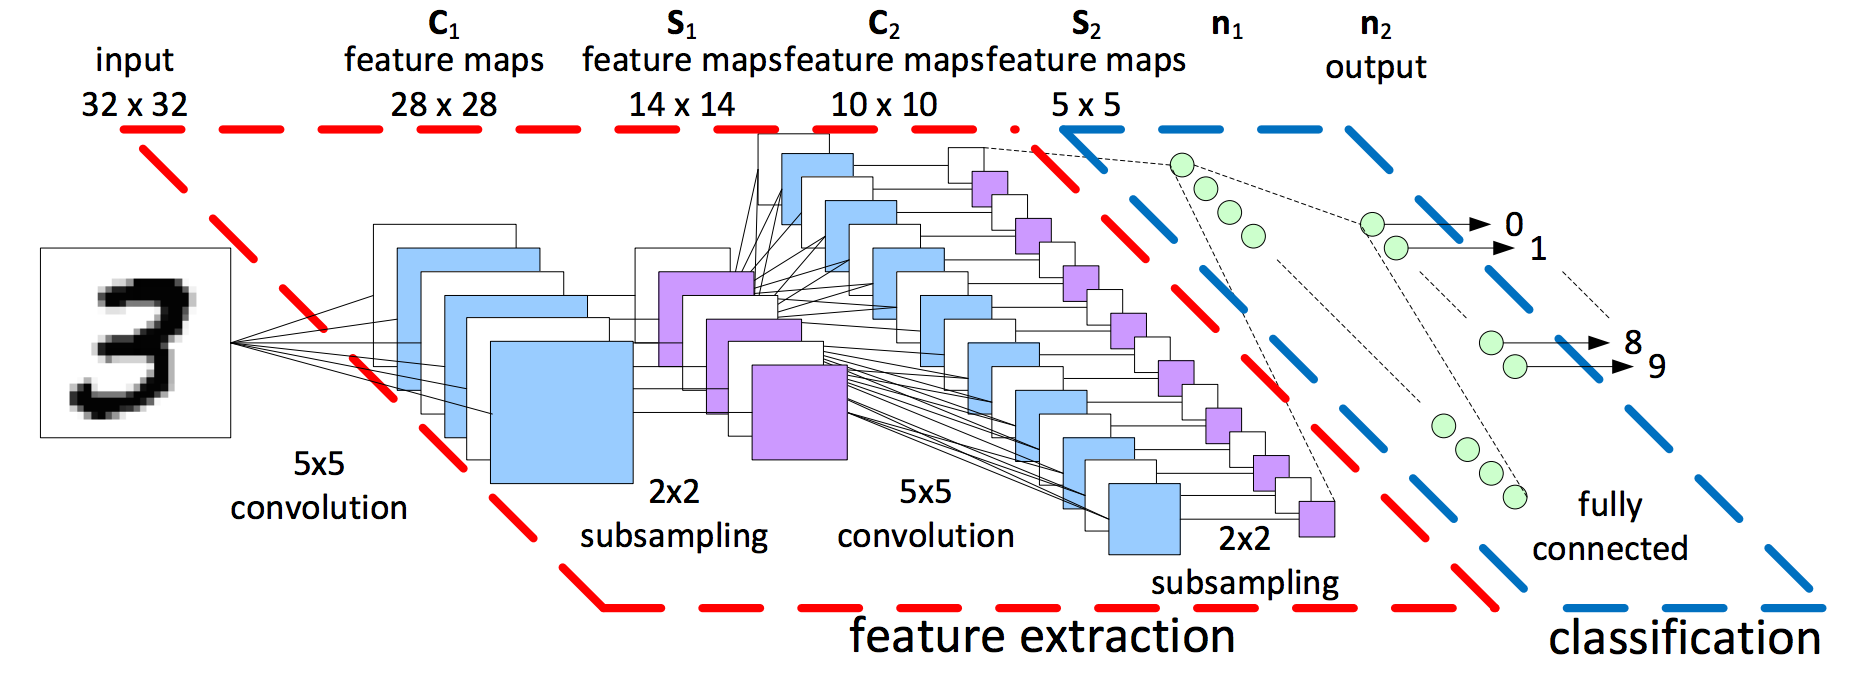

## About dataset
-------------------------------------------------------------------------------------------------------------------------------
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. 

## Convolutional Neural Networks
---------------------------------------------------------------------------------------------------------------------------------

Convolutional Nueral Networks is a special kind of neural networks that is used in image processing and image recognition, specifically designed to work on pixel data.

Convolutional Neural Networks are inspired by the brain. Research in the 1950s and 1960s by D.H Hubel and T.N Wiesel on the brain of mammals suggested a new model for how mammals perceive the world visually.  Based on this concept they were introduced in a paper by Bengio, Le Cun, Bottou and Haffner. Their first Convolutional Neural Network was called [LeNet-5](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf ) and was able to classify digits from hand-written numbers. 

Convolutional Neural Networks are a bit different than Nueral Networks. First of all, the layers are organised in 3 dimensions: width, height and depth. Further, the neurons in one layer do not connect to all the neurons in the next layer but only to a small region of it. Lastly, the final output will be reduced to a single vector of probability scores, organized along the depth dimension.

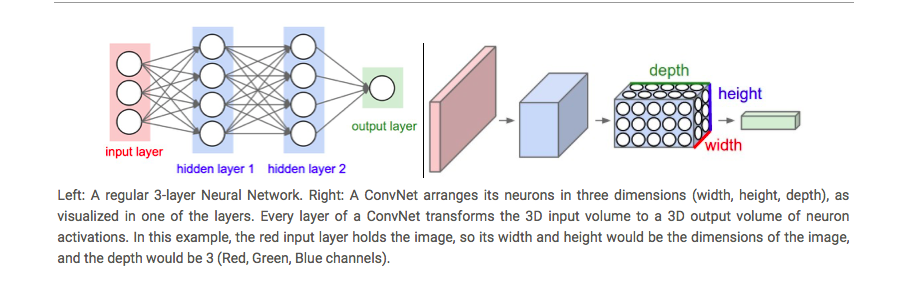

This is the components of CNN :-

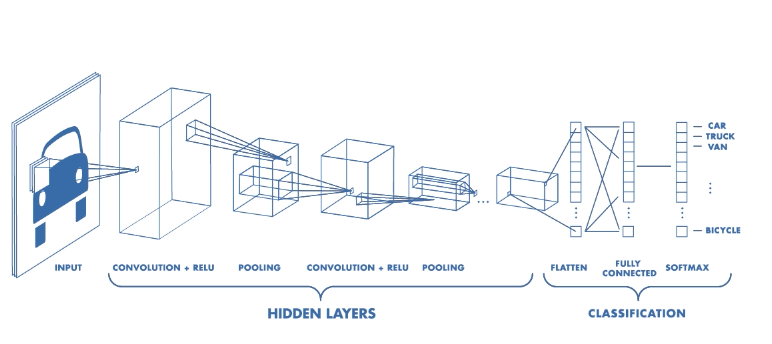


Convolution is one of the main building blocks of a CNN. The term convolution refers to the mathematical combination of two functions to produce a third function. It merges two sets of information.

In the case of a CNN, the convolution is performed on the input data with the use of a filter or kernel (these terms are used interchangeably) to then produce a feature map.

We execute a convolution by sliding the filter over the input. At every location, a matrix multiplication is performed and sums the result onto the feature map.

In the animation below, you can see the convolution operation. You can see the filter (the green square) is sliding over our input (the blue square) and the sum of the convolution goes into the feature map (the red square).

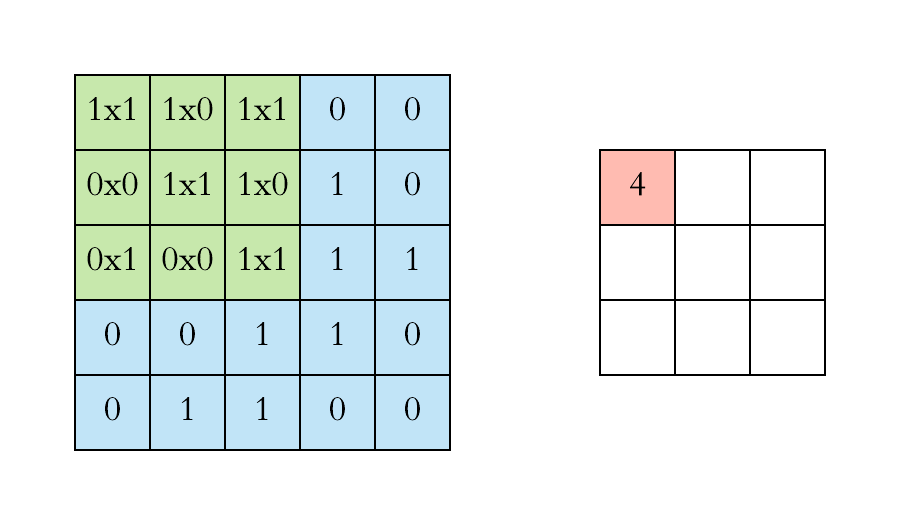





## Importing all the necessary modules

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from keras.layers import Conv2D, activations, Dropout,Flatten, MaxPooling2D, Dense, GlobalAveragePooling2D
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model
from keras.utils import np_utils
from keras import applications
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import cv2
import os
print(os.listdir("../input"))

%matplotlib inline
# Any results you write to the current directory are saved as output.

## A walkthrough to understand data
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

In [ ]:
train_data = pd.read_csv("../input/digit-recognizer/train.csv")
test_data = pd.read_csv("../input/digit-recognizer/test.csv")
train_data.head()

## Seperating features and labels


In [ ]:
labels = train_data["label"]
train_data = train_data.drop(["label"], axis = 1)
train_data.head()

## Visualizing the data

In [ ]:
f, axr = plt.subplots(2,2)
img1 = np.asarray(train_data.iloc[3]).reshape(28,28)
img2 = np.asarray(train_data.iloc[4]).reshape(28,28)
img3 = np.asarray(train_data.iloc[6]).reshape(28,28)
img4 = np.asarray(train_data.iloc[9]).reshape(28,28)

axr[0,0].imshow(img1, cmap = plt.get_cmap("gray"))
axr[0,1].imshow(img2, cmap = plt.get_cmap("gray"))
axr[1,0].imshow(img3, cmap = plt.get_cmap("gray"))
axr[1,1].imshow(img4, cmap = plt.get_cmap("gray"))

In [ ]:
train_data = np.asarray(train_data)
print("Shape of training data = ", train_data.shape)
test_data = np.asarray(test_data)
print("Shape of testing data = ", test_data.shape)

## Normalization
---------------------------------------------------------------------------------------------------------------------------------

This step is one of the important steps in building any model. So let me give you an introduction to **Normalization**.

### What is Data Normalization?
Data Normalization is a method used to standardize the range of independent variables or features of data. It is one of the cruicial stage of data preprocessing step. 

### Why data normalization?
We have to normalize our data because our features do not have uniform scale. Let me explain you by an example:

Say you have data of some peoples their age, income and sex:

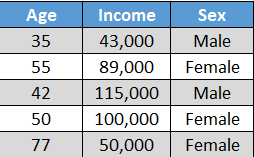

Now as we can see here the data about age and income both are of different scale and when we use this data without normalization or scaling it will cause us a huge problem. So, that's where data normalization comes to aid.

### How to normalize your data?

There are many techniques that we can use, some of them are:-

   ### 1.  Min-max normalization
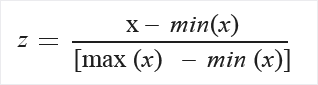

### 2.  Z-Score normalization
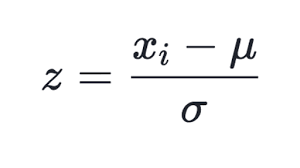

I used this technique in my notebook.

### 3.  Constant normalization
Take your value and divide by a constant. In case of images we will divide by 255 because it is largest value of pixle.





In [ ]:
# pros_train_data = train_data / train_data.mean()
pros_train_data = train_data - np.mean(train_data) / np.std(train_data)
pros_test_data = test_data - np.mean(test_data) / np.std(test_data)
                                   

### Splitting data into training and validation set

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(pros_train_data, labels, shuffle = True, test_size = 0.1)

In [ ]:
print("Shape of training data = ",train_x.shape, train_y.shape)
print("Shape of validation data = ", val_x.shape, val_y.shape)

### Reshaping data according to our model

In [ ]:
x_train = (train_x).reshape(-1, 28, 28, 1)
x_val = (val_x).reshape(-1, 28, 28, 1)

print(x_train.shape, x_val.shape)

### Applying one-hot encoding

In [ ]:
train_y = np_utils.to_categorical(train_y)
val_y = np_utils.to_categorical(val_y)
print(train_y.shape, val_y.shape)


## Building our model

In [ ]:
clf = Sequential()
clf.add(Conv2D(32, kernel_size = (3,3), activation = "relu", input_shape = (28,28,1), padding = "same"))
clf.add(MaxPooling2D((3,3), padding = "same"))
clf.add(Conv2D(32, kernel_size = (3,3), activation= "relu", padding="same"))
clf.add(MaxPooling2D((3,3), padding = "same"))
clf.add(Conv2D(64, kernel_size = (3,3), activation= "relu", padding="same"))
clf.add(Conv2D(128, kernel_size = (3,3), activation= "relu", padding="same"))
clf.add(MaxPooling2D((3,3), padding = "same"))
clf.add(Flatten())
clf.add(Dense(64, activation = "relu"))
clf.add(BatchNormalization())
clf.add(Dropout(0.5))
clf.add(Dense(10, activation = "softmax"))
clf.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
clf.summary()




In [ ]:
history = clf.fit(x_train, train_y, batch_size=32,epochs=50,verbose=1,validation_data=(x_val, val_y))

## Start predictions

In [ ]:
x_test = np.asarray(pros_test_data).reshape(-1, 28,28, 1)
pred = clf.predict(x_test)

predictions = np.argmax(pred,axis=1)
predictions.shape

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("my_attempt.csv", index=False, header=True)

## Visualizing losses and accuracy

In [ ]:
history.history.keys()

val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
acc = history.history["acc"]

epochs = [i for i in range(len(loss))]

plt.plot(val_acc)
plt.plot(acc)
plt.title("model accuracy")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.legend(["val_acc","acc"])
plt.show()



In [ ]:
plt.plot(val_loss)
plt.plot(loss)
plt.title("model loss")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.legend(["val_loss","loss"])
plt.show()



In [ ]:
datagen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)

batches = datagen.flow(x_train, train_y, batch_size = 32)
val_batches = datagen.flow(x_val, val_y, batch_size = 32)


In [ ]:
history=clf.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)


In [ ]:
pred = clf.predict(x_test)
prediction = np.argmax(pred,axis=1)
prediction.shape

submission=pd.DataFrame({"ImageId": list(range(1,len(prediction)+1)),
                         "Label": prediction})
submission.to_csv("my_third_best_submission2.csv", index=False, header=True)

## Conclusion

So, here ends our exploration journey. I hope this notebook will became helpful fou yo